<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Cnn_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Studi kasus ini adalah mengenai **klasifikasi gambar menggunakan Convolutional Neural Network (CNN)** dengan dataset **CIFAR-10** dari TensorFlow. Dataset ini terdiri dari **60,000 gambar berukuran 32x32 dalam 10 kelas**, seperti pesawat, mobil, burung, kucing, rusa, anjing, katak, kuda, kapal, dan truk.

### Tujuan dari Studi Kasus:
1. **Menggunakan dataset CIFAR-10** untuk klasifikasi gambar.
2. **Melakukan visualisasi dataset** untuk eksplorasi dan memahami distribusi gambar di masing-masing kelas.
3. **Membangun dan melatih model CNN** untuk memprediksi kelas dari gambar yang diberikan.
4. **Mengevaluasi performa model** dengan menggunakan metrik seperti akurasi, confusion matrix, dan laporan klasifikasi.

Dalam studi kasus ini, kita menggunakan **TensorFlow** untuk memuat dataset CIFAR-10, kemudian melakukan visualisasi untuk memahami distribusi data dan contoh gambar dari tiap kelas. Selanjutnya, kita membangun dan melatih model CNN untuk memprediksi kelas dari gambar, dan mengevaluasi model tersebut menggunakan metrik yang relevan.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Dataset Info
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

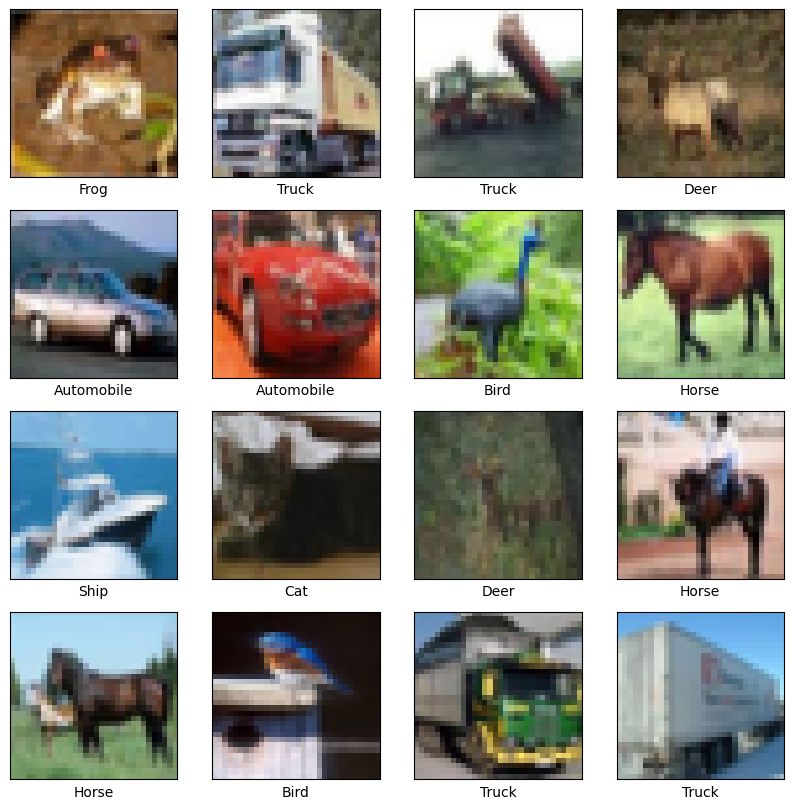

In [4]:
# Visualize some images from the dataset
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

<ipython-input-5-450e43711840>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_train.flatten(), palette='viridis')


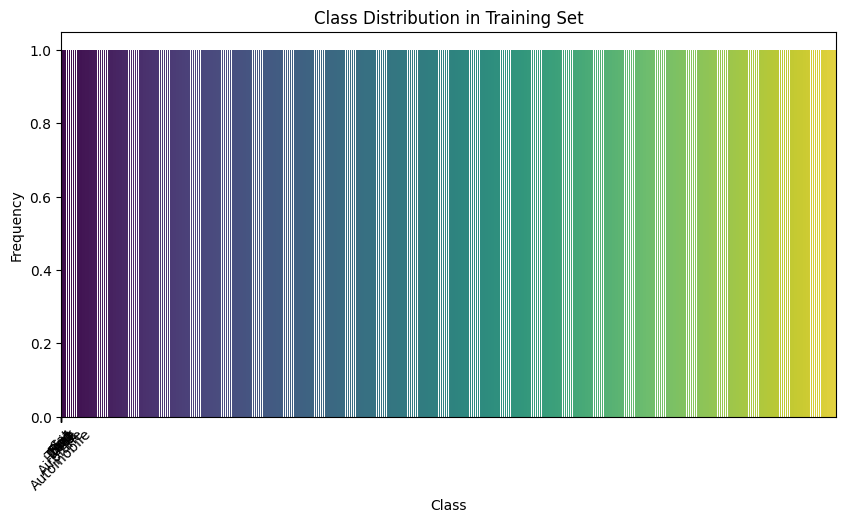

In [5]:
# Visualize class distribution
plt.figure(figsize=(10, 5))
sns.countplot(y_train.flatten(), palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

In [6]:
# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Build CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3506 - loss: 1.7435 - val_accuracy: 0.5592 - val_loss: 1.2233
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5842 - loss: 1.1730 - val_accuracy: 0.6362 - val_loss: 1.0326
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6504 - loss: 1.0026 - val_accuracy: 0.6248 - val_loss: 1.0781
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6910 - loss: 0.8921 - val_accuracy: 0.6683 - val_loss: 0.9577
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.7106 - loss: 0.8227 - val_accuracy: 0.6875 - val_loss: 0.8979
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7311 - loss: 0.7655 - val_accuracy: 0.7012 - val_loss: 0.8686
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7515 - loss: 0.7095 - val_accuracy: 0.6899 - val_loss: 0.9229
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7677 -

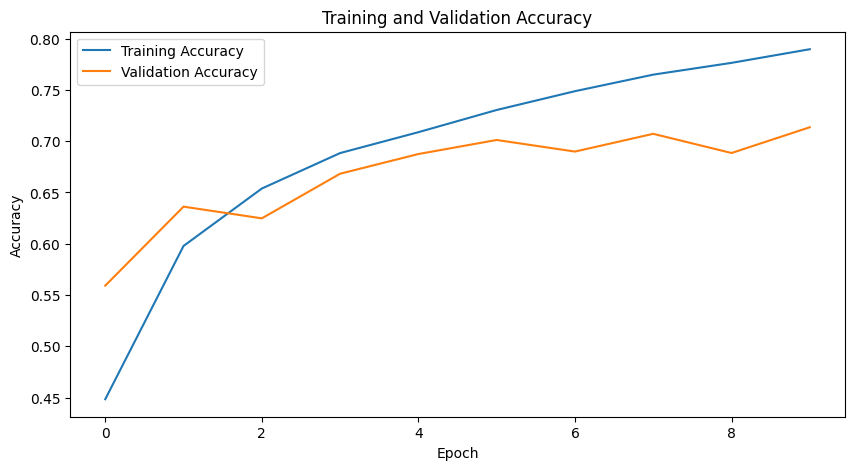

In [10]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

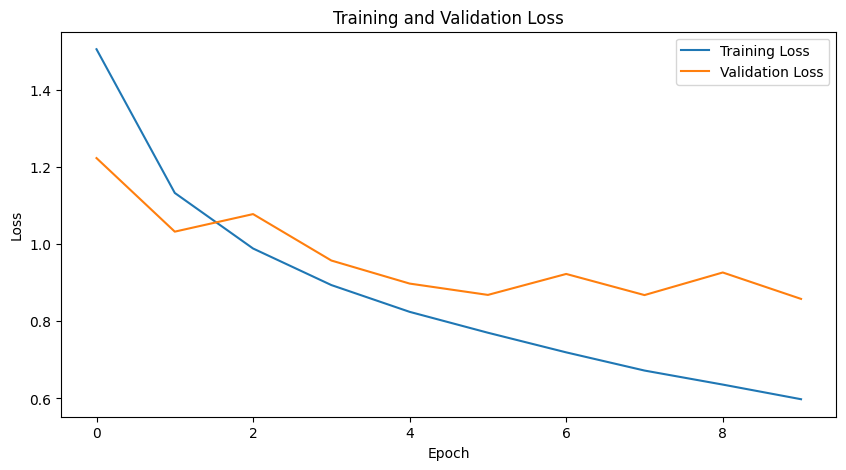

In [11]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 4s - 12ms/step - accuracy: 0.7136 - loss: 0.8582

Test accuracy: 0.7135999798774719


In [13]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


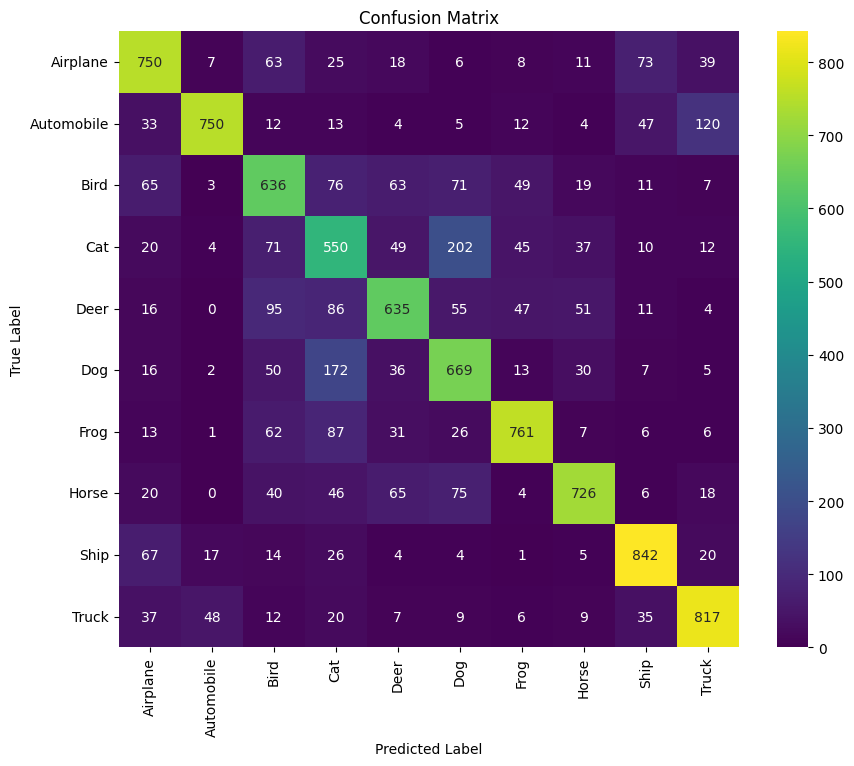

In [14]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='viridis', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred_classes, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

    Airplane       0.72      0.75      0.74      1000
  Automobile       0.90      0.75      0.82      1000
        Bird       0.60      0.64      0.62      1000
         Cat       0.50      0.55      0.52      1000
        Deer       0.70      0.64      0.66      1000
         Dog       0.60      0.67      0.63      1000
        Frog       0.80      0.76      0.78      1000
       Horse       0.81      0.73      0.76      1000
        Ship       0.80      0.84      0.82      1000
       Truck       0.78      0.82      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.72     10000
weighted avg       0.72      0.71      0.72     10000

